# Tarea Semanal 2
## Martín Deleón

### Consignas:

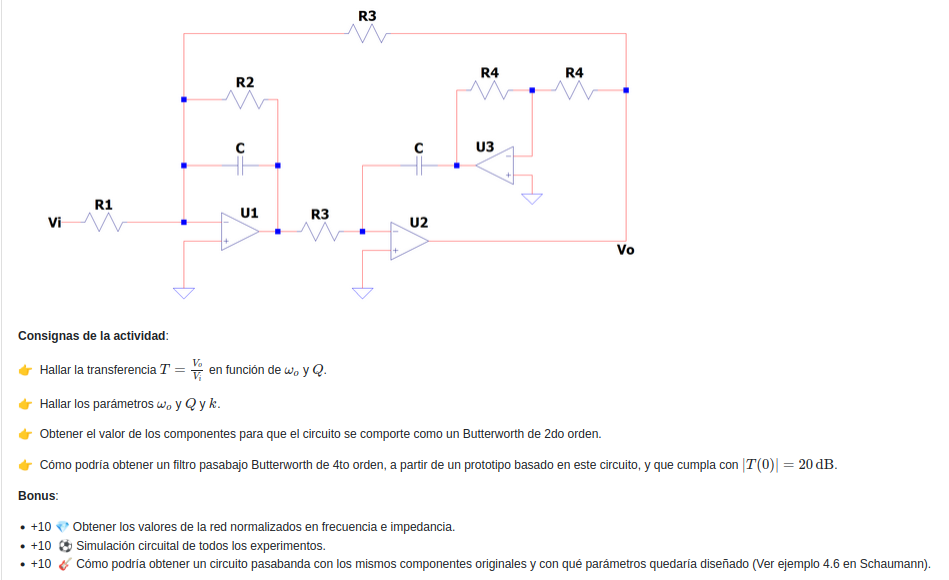


### 1. Busqueda de la función transferencia

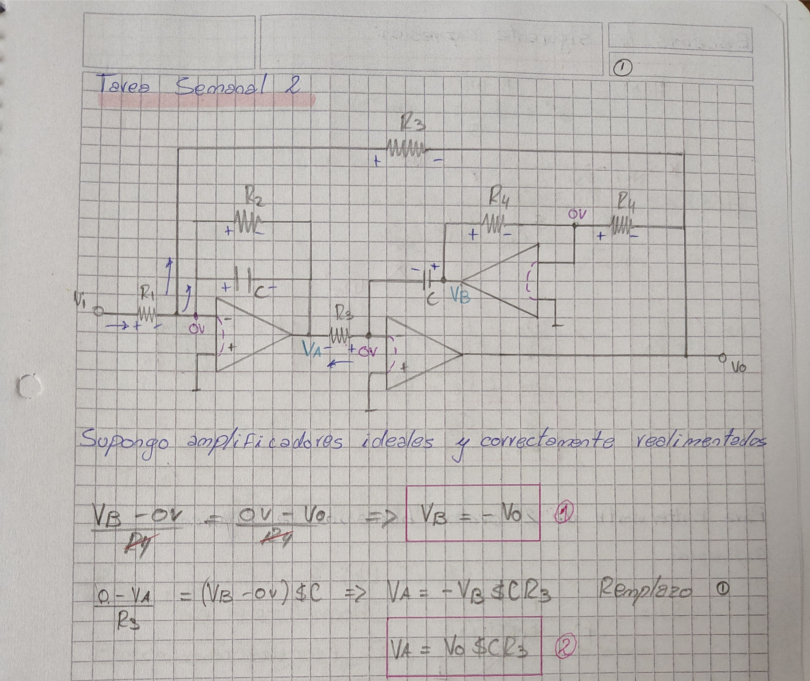
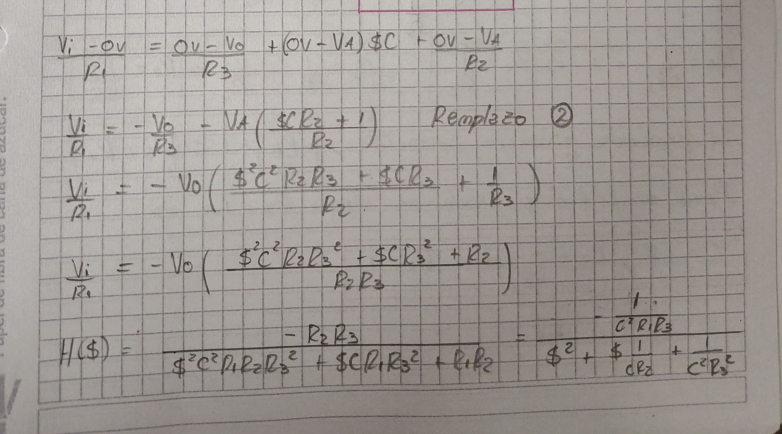


### 2. Busqueda de los parámetros 
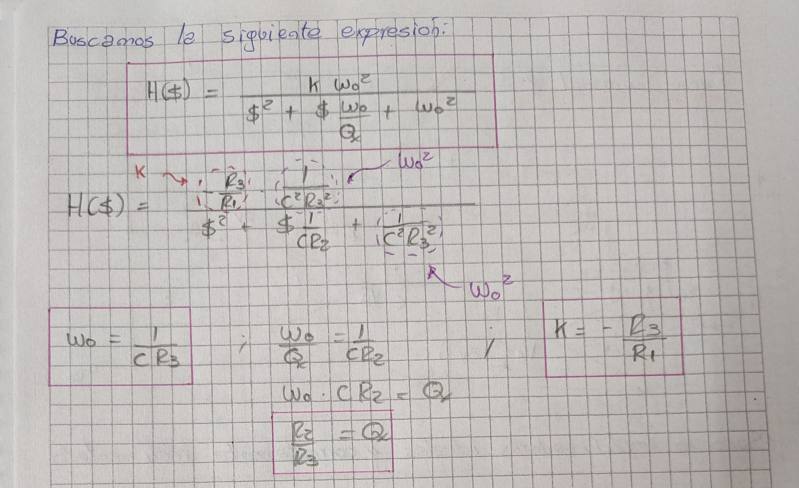


### 3. Butterworth de 2° orden
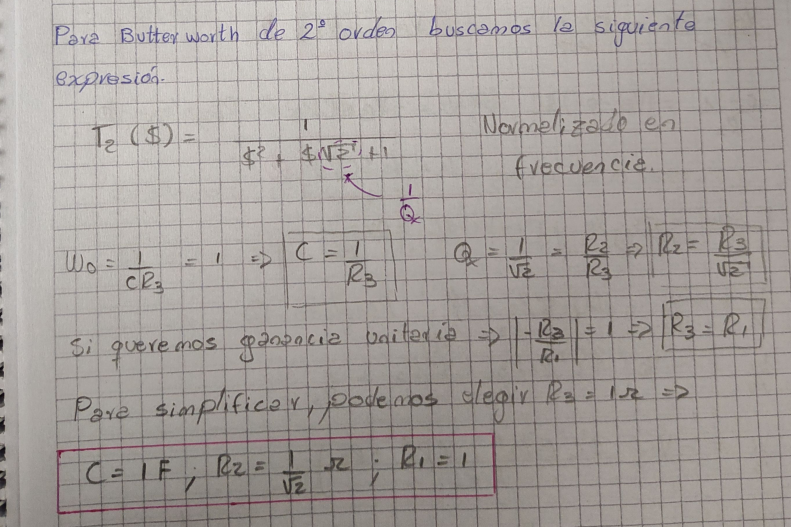

Para mayor claridad y comprensión del procedimiento lo invito a ver el [pdf](https://drive.google.com/file/d/1FCIDo8ogo_mYb9CiIUcM_NOr52H7h7J3/view?usp=sharing) en donde se encuentra la resolución del ejercicio.

### Simulaciones

Continuaremos con las simulaciones de las transferencias obtenidas utilizando Python.

In [ ]:
# Módulos para Python, algo parecido a los #include de C

# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig

# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

import matplotlib as mpl
import math
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento

plt.figure(1)
plt.close(1)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# Podés modificar el ancho y alto de los gráficos que generás
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig

# Ahora importamos las funciones de PyTC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

from pytc2.general import print_subtitle
from IPython.display import IFrame
IFrame("./sos_pb_lapiz.pdf", width=1000, height=1000)

Luego de incluir las librerias, definiremos el numerador y denominador de la transferencia del Butterwoth de orden dos.

TransferFunctionContinuous(
array([1.]),
array([1.        , 1.41421356, 1.        ]),
dt: None
)

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

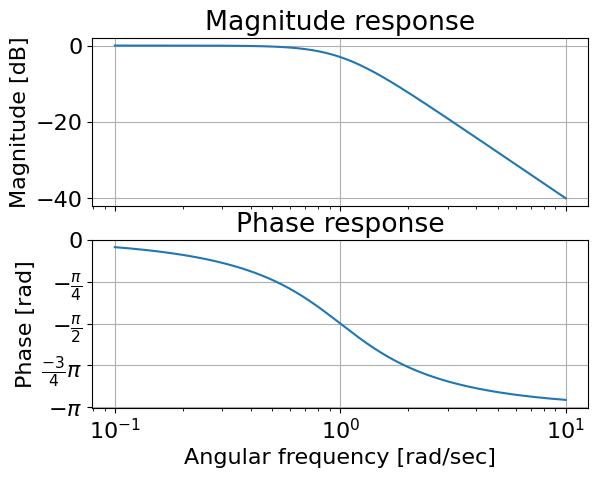

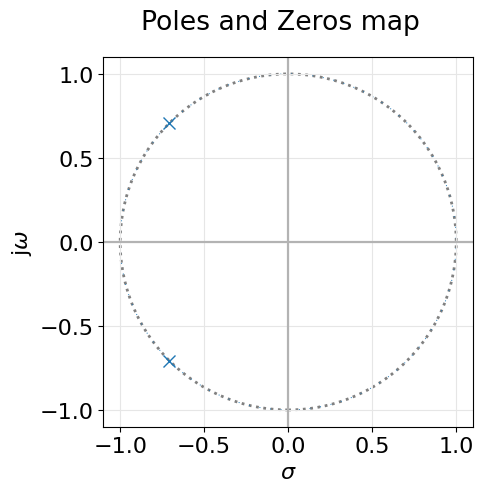

In [12]:
R1 = 1
R2 = 1/(math.sqrt(2))
A = 1/R2
R3 = 1
C = 1/R3

K = R3/R1   #Ganancia del filtro
W = 1/(C*R3)   #Frecuencia angular al cuadrado normalizada
Q = R2/R3
num=np.array([K*W**2])
den=np.array([1,1/Q,W**2])


#Buscamos la transferencia
H=sig.TransferFunction(num,den)
display(H)


_, axes_hdl = bodePlot(H)

plt.sca(axes_hdl[0])


pzmap(H)

Como era de esperar en el diagrama de polos se pueden ver un par de polos complejos conjugados situados sobre la circunsferencia unitaria. Más adelante se vera que al realizar un Butterworth de 4° orden apareceran dos pares de polos complejos conjugados sobre la circusnferencia unitaria.

### Butterworth orden 4

Continuaremos con la busqueda de la función transferencia de un filtro Butterworth de 4° orden. Para esto, no podemos utilizar exactamente dos circuitos como el anteriormente analizado. Debemos modificar el "Q" para obtener la apertura angular deseada.

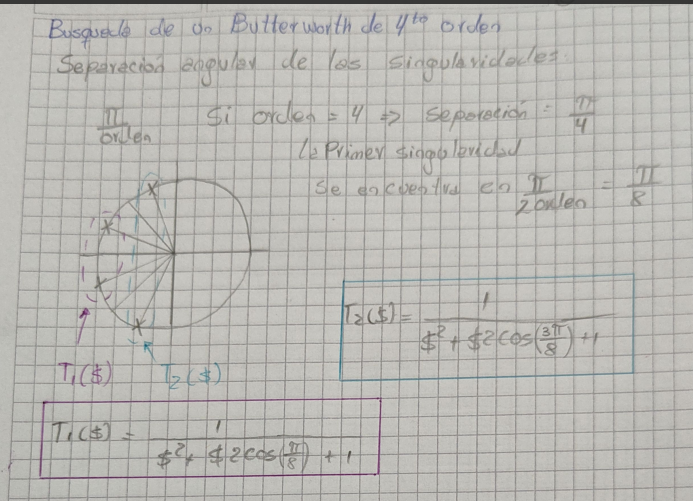

Ademas se desea que el mismo tenga una ganancia de 20db para continua, por lo que tendremos que ajustar la ganancia de cada uno de ellos. En este caso se selecciono una ganancia de 10 veces para el primer filtro y luego una ganancia unitaria para el segundo. De esta manera se obtienen 20db a frecuencia nula.

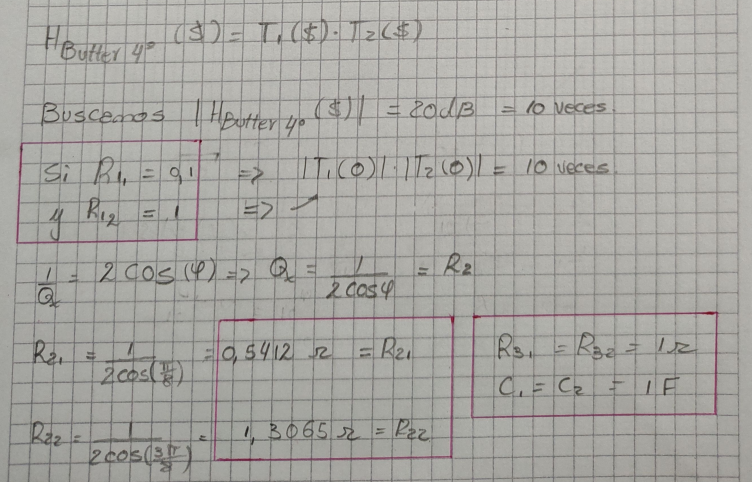


Para obtener la transferencia utilizando pyton definiremos 2 variables con el fin de simplificar la escritura del codigo.

Insertar imágen de la resolucion

TransferFunctionContinuous(
array([10.]),
array([1.        , 2.61312593, 3.41421356, 2.61312593, 1.        ]),
dt: None
)

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

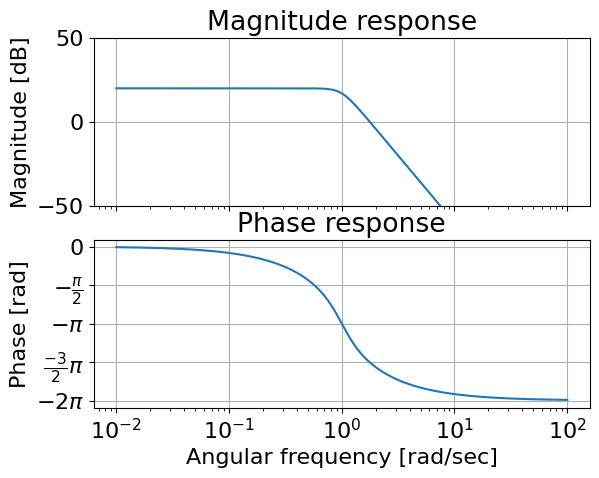

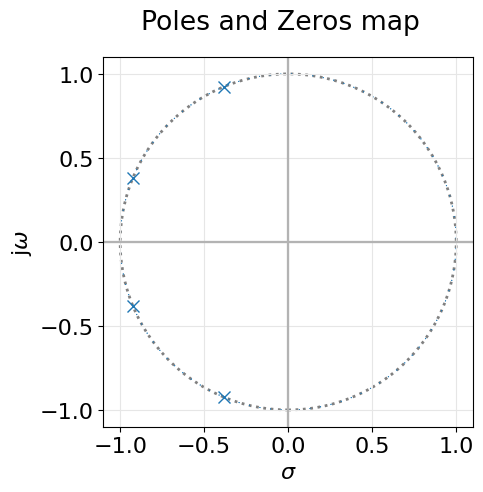

In [17]:
const1 = 2*math.cos(math.pi/8)
const2 = 2*math.cos(math.pi*(3/8))

R11 = 0.1
R21 = 1
R12 = 1/2*math.cos(math.pi/8)
R22 = 1/2*math.cos(math.pi*(3/8))
R13 = 1
R23 = 1
C = 1/R13

K1 = R13/R11   #Ganancia del filtro
K2 = R23/R21   #Ganancia del filtro
W1 = 1/(C*R13)   #Frecuencia angular al cuadrado normalizada
Q1 = R12/R13
num=np.array([K1*K2*W**4])
den=np.array([1,(const1 + const2), (2+const1*const2), (const1 + const2) ,W1**2])


#Buscamos la transferencia
H=sig.TransferFunction(num,den)
display(H)


_, axes_hdl = bodePlot(H)

plt.sca(axes_hdl[0])
plt.ylim([-50,50])

pzmap(H)

Este gráfico de polos y ceros coincide con lo anteriormente mencionado.